# Simplest CNN for MNIST
---

In [14]:
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

#### Load MNIST dataset

In [15]:
train_data = MNIST(root='data', train=True, transform=ToTensor(), download=True)
test_data = MNIST(root='data', train=False, transform=ToTensor(), download=True)

*downsample tarining set*

In [16]:
is_downsampling = True

In [17]:
N = 5000

In [18]:
if is_downsampling:
    # Create a subset of the training dataset with the first N examples
    train_data = Subset(train_data, range(N))

#### Define the data loaders

In [19]:
train_loader = DataLoader(train_data, batch_size=200, shuffle=True)
test_loader = DataLoader(test_data, batch_size=200, shuffle=False)

'''
At this stage, train_loader and test_loader contains batches of images to use.
If we run '> images, labels = next(iter(train_loader))' we can get the firat batch of data 
which will have shape = (200, 1, 28, 28)
'''

"\nAt this stage, train_loader and test_loader contains batches of images to use.\nIf we run '> images, labels = next(iter(train_loader))' we can get the firat batch of data \nwhich will have shape = (200, 1, 28, 28)\n"

In [20]:
# Define the device to use
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
# Define the model and move it to the device
import CNN_class

cnn = CNN_class.CNN().to(device)

### CNN architecture schema

In [22]:
from torchsummary import summary

summary(cnn, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 26, 26]          320
├─Conv2d: 1-2                            [-1, 64, 24, 24]          18,496
├─Linear: 1-3                            [-1, 128]                 4,718,720
├─Linear: 1-4                            [-1, 10]                  1,290
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
Total mult-adds (M): 15.53
Input size (MB): 0.00
Forward/backward pass size (MB): 0.45
Params size (MB): 18.08
Estimated Total Size (MB): 18.53


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 26, 26]          320
├─Conv2d: 1-2                            [-1, 64, 24, 24]          18,496
├─Linear: 1-3                            [-1, 128]                 4,718,720
├─Linear: 1-4                            [-1, 10]                  1,290
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
Total mult-adds (M): 15.53
Input size (MB): 0.00
Forward/backward pass size (MB): 0.45
Params size (MB): 18.08
Estimated Total Size (MB): 18.53

In [23]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters())

### Training and Testing

In [24]:
num_epochs = 10

In [25]:
# Define empty lists to store the loss and accuracy values
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):

    train_loss = 0.0
    train_correct = 0

    cnn.train()

    idx_b = 0

    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # forward inputs
        outputs = cnn.forward(inputs)

        # evaluate loss
        loss = criterion(outputs, labels)

        # backproagation
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

        # print(f'Epoch {epoch+1}, Batch {idx_b+1} processed')

        idx_b += 1

    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_accuracy)


    # TESTING

    test_loss = 0.0
    test_correct = 0

    cnn.eval()

    with torch.no_grad():
        for inputs, labels in test_loader:

            inputs, labels = inputs.to(device), labels.to(device)

            # forward inputs
            outputs = cnn.forward(inputs)

            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)

    test_loss_list.append(test_loss)
    test_acc_list.append(test_accuracy)

    # Print the results for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10, Train Loss: 1.0339, Train Accuracy: 0.6862, Test Loss: 0.4225, Test Accuracy: 0.8816
Epoch 2/10, Train Loss: 0.3048, Train Accuracy: 0.9114, Test Loss: 0.2826, Test Accuracy: 0.9154
Epoch 3/10, Train Loss: 0.1776, Train Accuracy: 0.9512, Test Loss: 0.1997, Test Accuracy: 0.9389
Epoch 4/10, Train Loss: 0.1117, Train Accuracy: 0.9700, Test Loss: 0.1659, Test Accuracy: 0.9495
Epoch 5/10, Train Loss: 0.0693, Train Accuracy: 0.9786, Test Loss: 0.1402, Test Accuracy: 0.9568
Epoch 6/10, Train Loss: 0.0412, Train Accuracy: 0.9894, Test Loss: 0.1262, Test Accuracy: 0.9628
Epoch 7/10, Train Loss: 0.0257, Train Accuracy: 0.9940, Test Loss: 0.1319, Test Accuracy: 0.9627
Epoch 8/10, Train Loss: 0.0143, Train Accuracy: 0.9964, Test Loss: 0.1264, Test Accuracy: 0.9656
Epoch 9/10, Train Loss: 0.0114, Train Accuracy: 0.9982, Test Loss: 0.1214, Test Accuracy: 0.9665
Epoch 10/10, Train Loss: 0.0053, Train Accuracy: 0.9996, Test Loss: 0.1406, Test Accuracy: 0.9643


### PLots

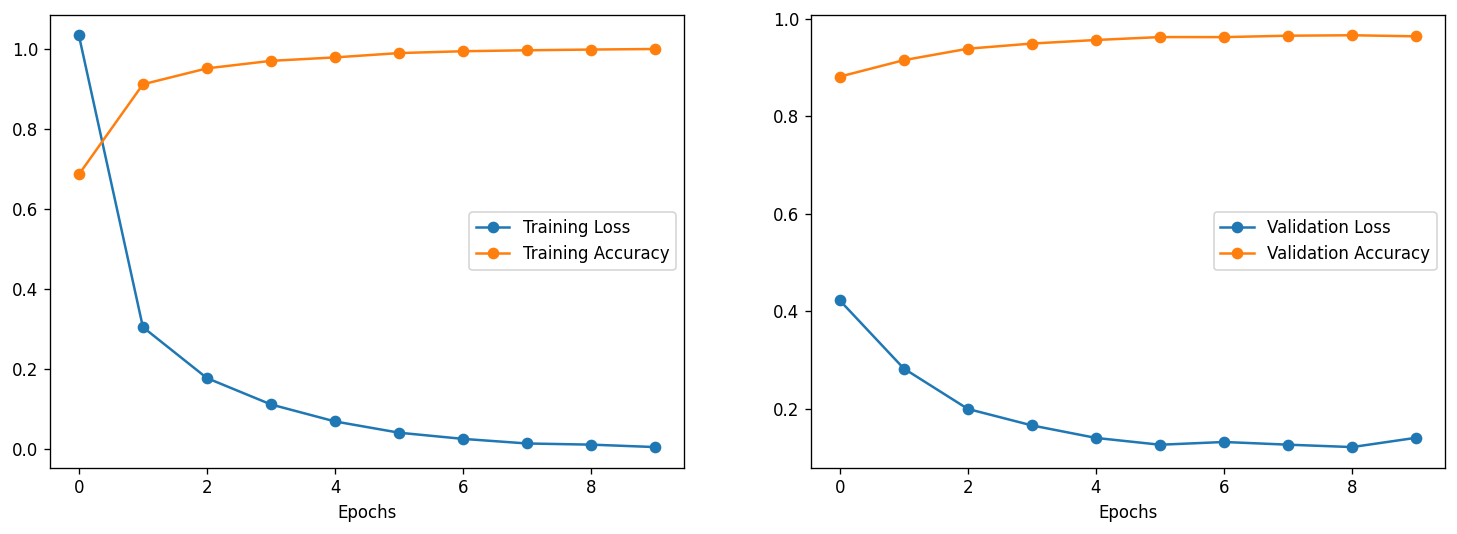

In [27]:
plt.rcParams['figure.dpi'] = 120
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot training loss and accuracy
ax1.plot(train_loss_list, label='Training Loss', marker='o')
ax1.plot(train_acc_list, label='Training Accuracy', marker='o')
ax1.set_xlabel('Epochs')
ax1.legend()

# Plot validation loss and accuracy
ax2.plot(test_loss_list, label='Validation Loss', marker='o')
ax2.plot(test_acc_list, label='Validation Accuracy', marker='o')
ax2.set_xlabel('Epochs')
ax2.legend()

# Show the plot
plt.show()
